In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
pd.__version__

'2.2.2'

In [4]:
movie_df = pd.read_csv(r'C:\Users\USER\Desktop\movie datasets\movie.csv')
genre_df = pd.read_csv(r'C:\Users\USER\Desktop\movie datasets\genre.csv')
director_df = pd.read_csv(r'C:\Users\USER\Desktop\movie datasets\director.csv')
country_df = pd.read_csv(r'C:\Users\USER\Desktop\movie datasets\country.csv')
language_df = pd.read_csv(r'C:\Users\USER\Desktop\movie datasets\language.csv')

#### merging movie with genre

In [5]:
netflix_df= (movie_df
             .merge(genre_df, on='genre_id', how='left')
             .merge(director_df, on='director_id', how='left')
             .merge(country_df, on='country_id', how='left')
             .merge(language_df, on='language_id', how='left')
            ).reset_index(drop=True)

In [10]:
netflix_df.columns

Index(['movie_id', 'title', 'release_year', 'rating', 'watchtime_inminutes',
       'number_of_views', 'imbd_rating', 'awards_won', 'budget',
       'box_office_revenue', 'genre_id', 'director_id', 'country_id',
       'language_id', 'genre', 'director', 'country', 'language'],
      dtype='object')

In [11]:
netflix_df.rename({'watchtime_inminutes':'watchtime_inMinutes'}, axis=1, inplace=True)

In [139]:
netflix_df.columns

Index(['movie_id', 'title', 'release_year', 'rating', 'watchtime_inMinutes',
       'number_of_views', 'imbd_rating', 'awards_won', 'budget',
       'box_office_revenue', 'genre_id', 'director_id', 'country_id',
       'language_id', 'genre', 'director', 'country', 'language'],
      dtype='object')

# Data Analysis and Visualization

### Analyze the distribution of ratings, genres, or box office revenue.

In [12]:
ratings_genres_revenue = netflix_df.groupby(['imbd_rating','genre'])['box_office_revenue'].sum().nlargest().reset_index()
ratings_genres_revenue

,imbd_rating,genre,box_office_revenue
0,8.21,Romance,964696309
1,9.10,Comedy,930184648
2,0.16,Drama,914939572
3,6.02,Drama,873173408
4,9.50,Horror,864672055


### distributions for ratings

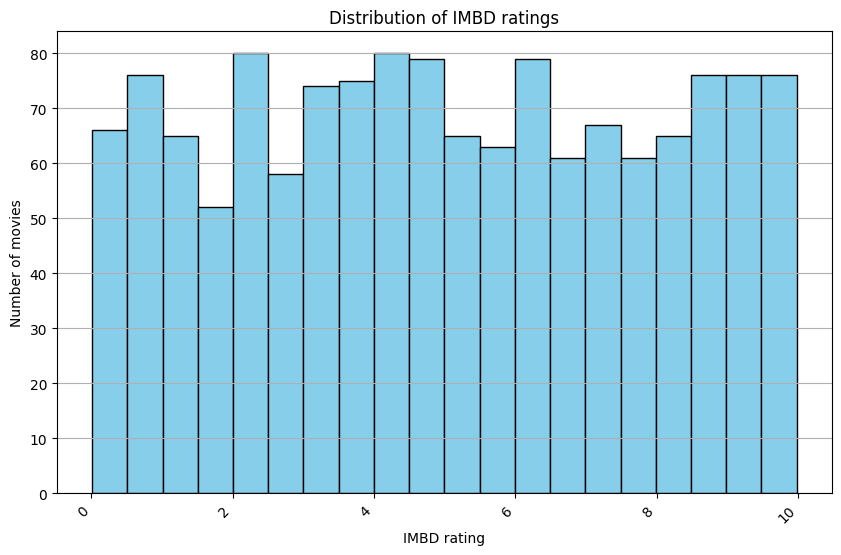

In [13]:
plt.figure(figsize=(10,6))
plt.hist(netflix_df['imbd_rating'],bins=20, color='skyblue', edgecolor='black') 
plt.title('Distribution of IMBD ratings')   
plt.xlabel('IMBD rating')
plt.ylabel('Number of movies')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

### Counting the number of movies in each genre

In [12]:
genre_count = netflix_df['genre'].value_counts().reset_index()
genre_count


,genre,count
0,Horror,265
1,Romance,242
2,Drama,235
3,Action,230
4,Comedy,215
5,Thriller,207


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Horror'),
  Text(1, 0, 'Romance'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Action'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, 'Thriller')])

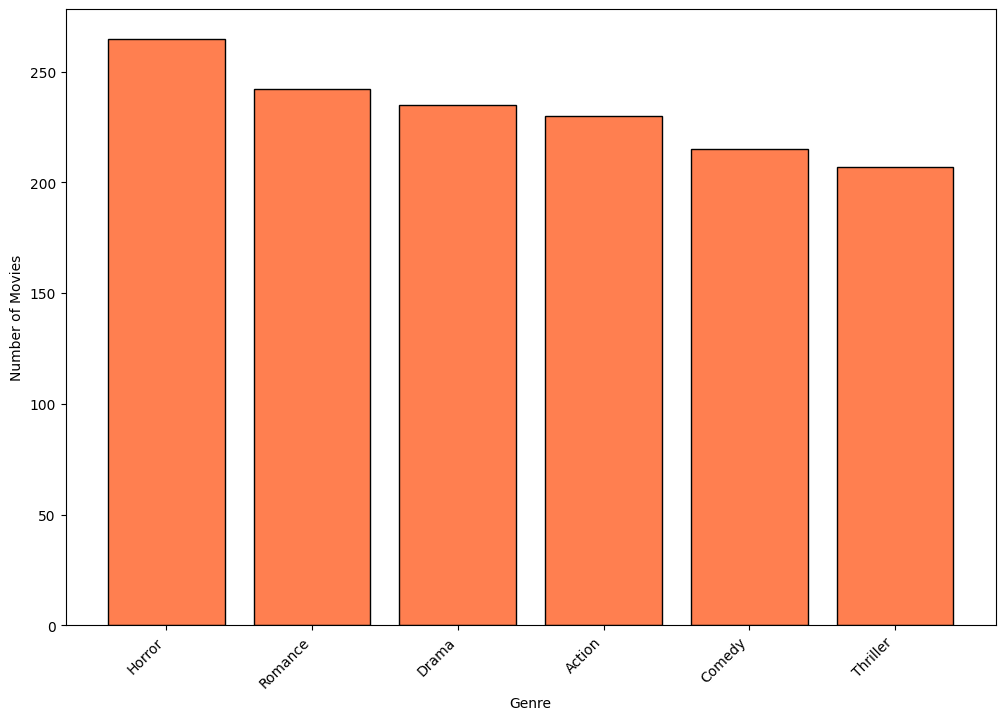

In [143]:
plt.figure(figsize=(12,8))
plt.bar(genre_count['genre'], genre_count['count'],color='coral', edgecolor='black')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation =45, ha='right')

### Plotting the distribution of box office revenue 

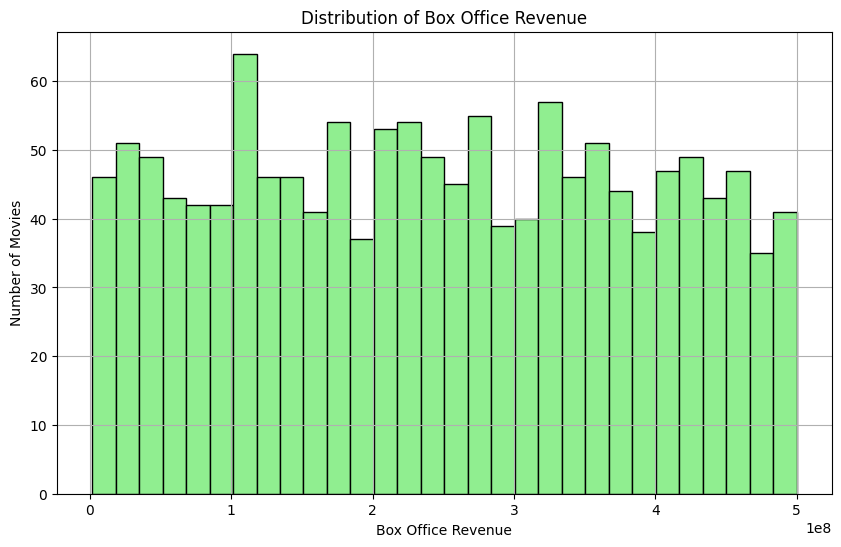

In [144]:
plt.figure(figsize=(10, 6))
plt.hist(netflix_df['box_office_revenue'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Box Office Revenue')
plt.xlabel('Box Office Revenue')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

### Which genre has the highest average box office revenue?

In [145]:
netflix_df.columns

Index(['movie_id', 'title', 'release_year', 'rating', 'watchtime_inMinutes',
       'number_of_views', 'imbd_rating', 'awards_won', 'budget',
       'box_office_revenue', 'genre_id', 'director_id', 'country_id',
       'language_id', 'genre', 'director', 'country', 'language'],
      dtype='object')

In [87]:
genre_average_revenue = netflix_df.groupby(['genre'])['box_office_revenue'].mean().sort_values(ascending = False).reset_index()
genre_average_revenue

,genre,box_office_revenue
0,Comedy,2.544434e+08
1,Romance,2.539713e+08
2,Drama,2.475016e+08
3,Thriller,2.446676e+08
4,Horror,2.440490e+08
5,Action,2.337296e+08


Text(0, 0.5, 'box office revenue')

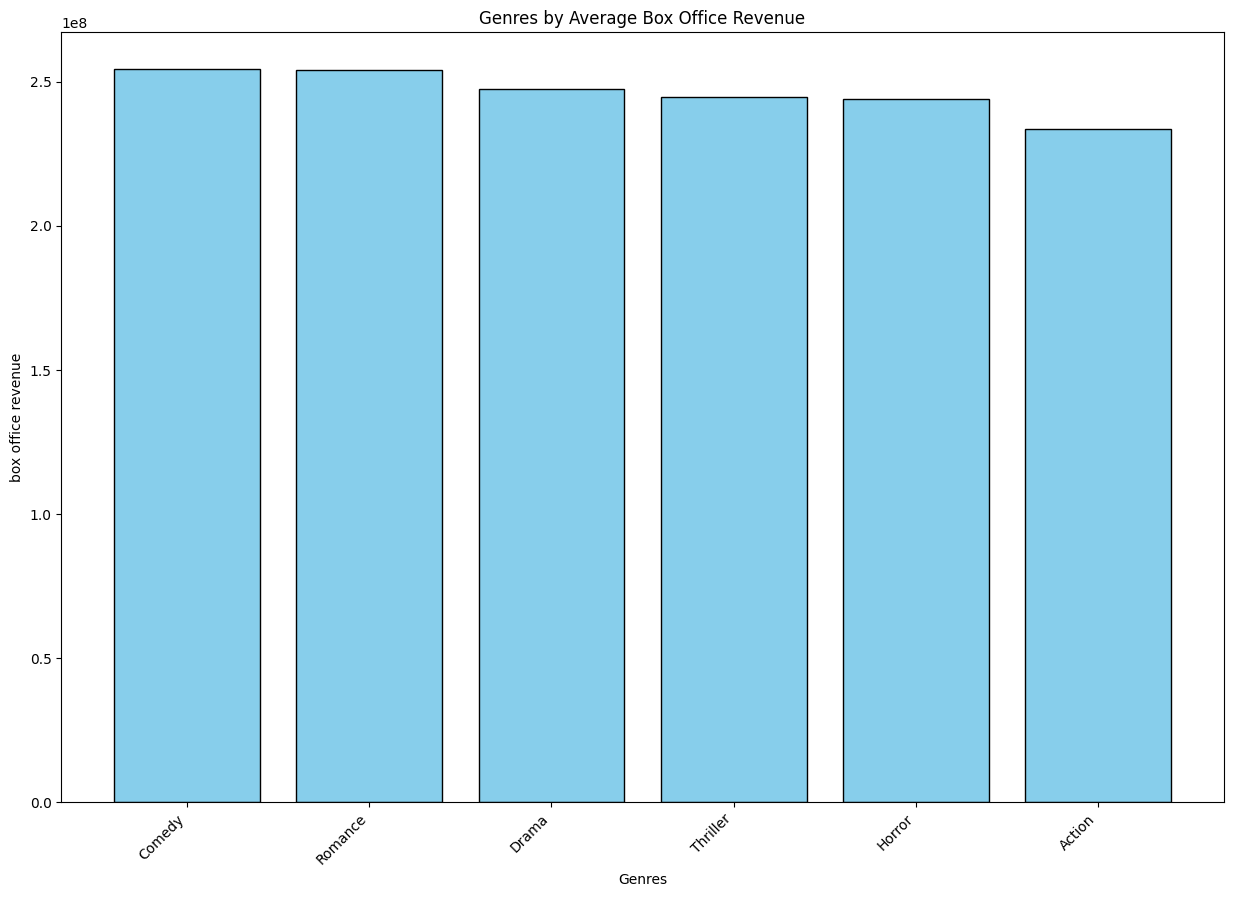

In [96]:
plt.figure(figsize=(15,10))
plt.bar(genre_average_revenue['genre'],genre_average_revenue['box_office_revenue'],color = 'skyblue',edgecolor ='black')
plt.title('Genres by Average Box Office Revenue')
plt.xticks(rotation = 45, ha='right')
plt.xlabel('Genres')
plt.ylabel('box office revenue')


### Director Analysis: Identify the most successful directors based on average box office revenue and IMDB ratings.

In [15]:
most_suceesful_director =netflix_df.groupby(['director'])['box_office_revenue'].mean().sort_values(ascending = False).reset_index()
most_suceesful_director

,director,box_office_revenue
0,Quentin Tarantino,2.625247e+08
1,Steven Spielberg,2.527455e+08
2,James Cameron,2.391133e+08
3,Christopher Nolan,2.382672e+08
4,Martin Scorsese,2.382456e+08


### number of movies released per year

In [16]:
netflix_df.columns

Index(['movie_id', 'title', 'release_year', 'rating', 'watchtime_inMinutes',
       'number_of_views', 'imbd_rating', 'awards_won', 'budget',
       'box_office_revenue', 'genre_id', 'director_id', 'country_id',
       'language_id', 'genre', 'director', 'country', 'language'],
      dtype='object')

In [24]:
number_of_movies_released =netflix_df.groupby(['release_year'])['movie_id'].nunique().sort_values(ascending=False).reset_index()
number_of_movies_released

,release_year,movie_id
0,2015,80
1,2020,73
2,2000,71
3,2006,69
4,2003,68
5,2001,65
6,2012,64
7,2005,63
8,2009,62
9,2011,62


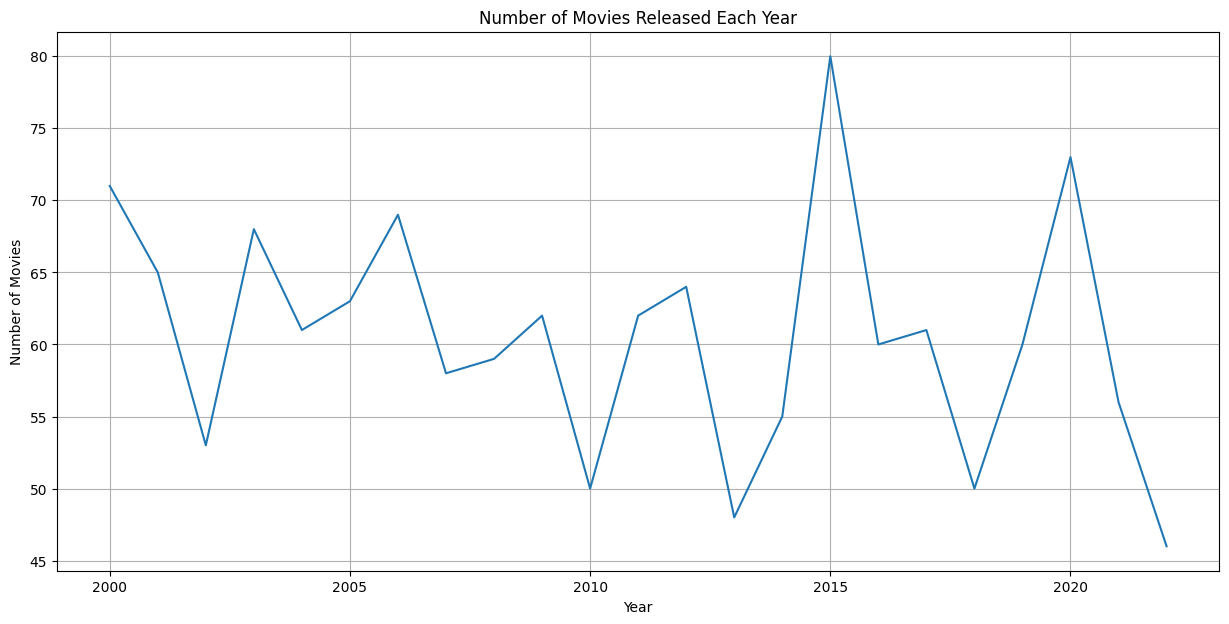

In [10]:
plt.figure(figsize=(15, 7))
movies_per_year = netflix_df.groupby('release_year').size()
movies_per_year.plot(kind='line')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

### Determine correlations between variables such as budget and box_office_revenue

In [35]:
netflix_df.columns  

Index(['movie_id', 'title', 'release_year', 'rating', 'watchtime_inMinutes',
       'number_of_views', 'imbd_rating', 'awards_won', 'budget',
       'box_office_revenue', 'genre_id', 'director_id', 'country_id',
       'language_id', 'genre', 'director', 'country', 'language'],
      dtype='object')

In [72]:
correlation_between_variables =netflix_df[['budget','box_office_revenue']].corr().reset_index()
correlation_between_variables

,index,budget,box_office_revenue
0,budget,1.000000,0.002012
1,box_office_revenue,0.002012,1.000000


### Top 10 Analysis: Identify the top 10 movies by various criteria (e.g., revenue, IMDB rating).

In [41]:
netflix_df.columns

Index(['movie_id', 'title', 'release_year', 'rating', 'watchtime_inMinutes',
       'number_of_views', 'imbd_rating', 'awards_won', 'budget',
       'box_office_revenue', 'genre_id', 'director_id', 'country_id',
       'language_id', 'genre', 'director', 'country', 'language'],
      dtype='object')

In [54]:
top_10_analysis =netflix_df.groupby(['title'])['imbd_rating'].nunique().sort_values(ascending=False).reset_index()
top_10_analysis

,title,imbd_rating
0,The Godfather,144
1,The Lord of the Rings: The Return of the King,144
2,One Flew Over the Cuckoo's Nest,133
3,The Godfather: Part II,133
4,Pulp Fiction,132
5,Inception,131
6,12 Angry Men,123
7,Schindler's List,122
8,The Shawshank Redemption,122
9,The Dark Knight,121


### movies with the highest watch time in minutes 

In [55]:
netflix_df.columns

Index(['movie_id', 'title', 'release_year', 'rating', 'watchtime_inMinutes',
       'number_of_views', 'imbd_rating', 'awards_won', 'budget',
       'box_office_revenue', 'genre_id', 'director_id', 'country_id',
       'language_id', 'genre', 'director', 'country', 'language'],
      dtype='object')

In [62]:
highest_watch_time =netflix_df.groupby(['title'])['imbd_rating'].nunique().sort_values(ascending=False).reset_index()
highest_watch_time

,title,imbd_rating
0,The Godfather,144
1,The Lord of the Rings: The Return of the King,144
2,One Flew Over the Cuckoo's Nest,133
3,The Godfather: Part II,133
4,Pulp Fiction,132
5,Inception,131
6,12 Angry Men,123
7,Schindler's List,122
8,The Shawshank Redemption,122
9,The Dark Knight,121


### How does the average budget compare across different countries?

In [63]:
netflix_df.columns

Index(['movie_id', 'title', 'release_year', 'rating', 'watchtime_inMinutes',
       'number_of_views', 'imbd_rating', 'awards_won', 'budget',
       'box_office_revenue', 'genre_id', 'director_id', 'country_id',
       'language_id', 'genre', 'director', 'country', 'language'],
      dtype='object')

In [64]:
average_budget_across_countries =netflix_df.groupby(['country'])['budget'].mean().sort_values(ascending=True).reset_index()
average_budget_across_countries


,country,budget
0,Australia,5.020325e+07
1,India,5.224390e+07
2,USA,5.236868e+07
3,Canada,5.304352e+07
4,UK,5.386216e+07


### Which countries produce the most award-winning movies?

In [13]:
award_winning_countries =netflix_df.groupby(['director'])['awards_won'].sum().sort_values(ascending=False).reset_index()
award_winning_countries

,director,awards_won
0,Christopher Nolan,1336
1,Steven Spielberg,1331
2,Quentin Tarantino,1228
3,Martin Scorsese,1209
4,James Cameron,1175


### distribution of imbd ratings

Text(0.5, 0, 'imbd rating')

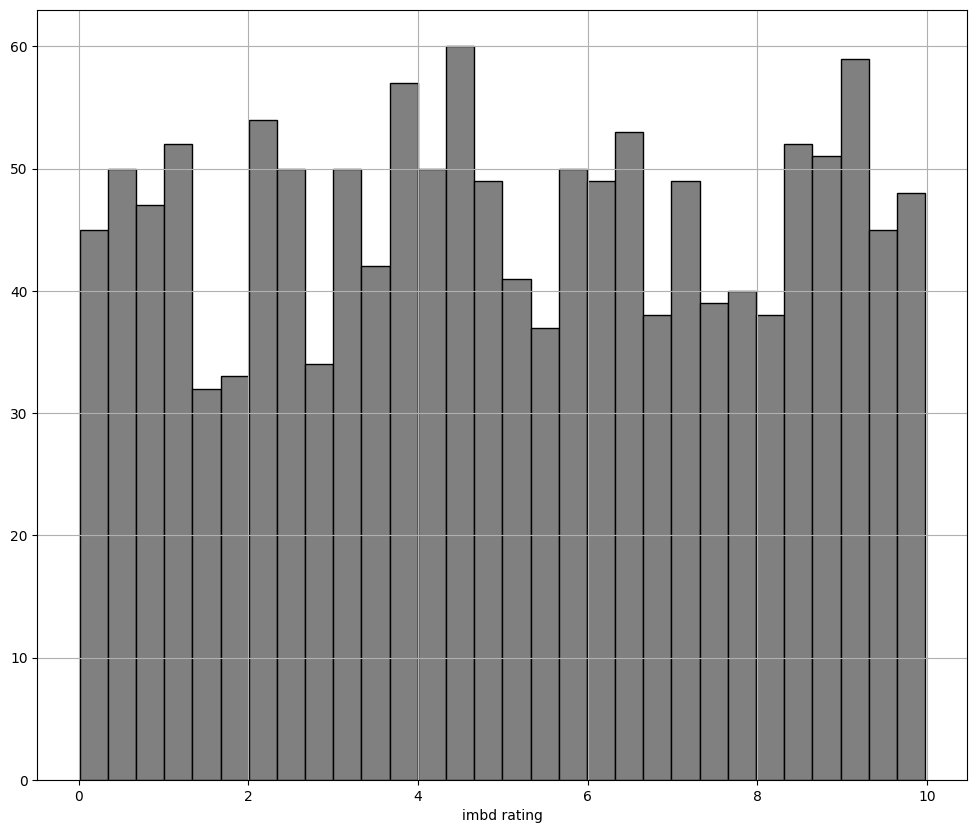

In [100]:
plt.figure(figsize=(12,10))
plt.hist(netflix_df['imbd_rating'], bins=30, color='gray',edgecolor='black')
plt.grid(True)
plt.xlabel('imbd rating')